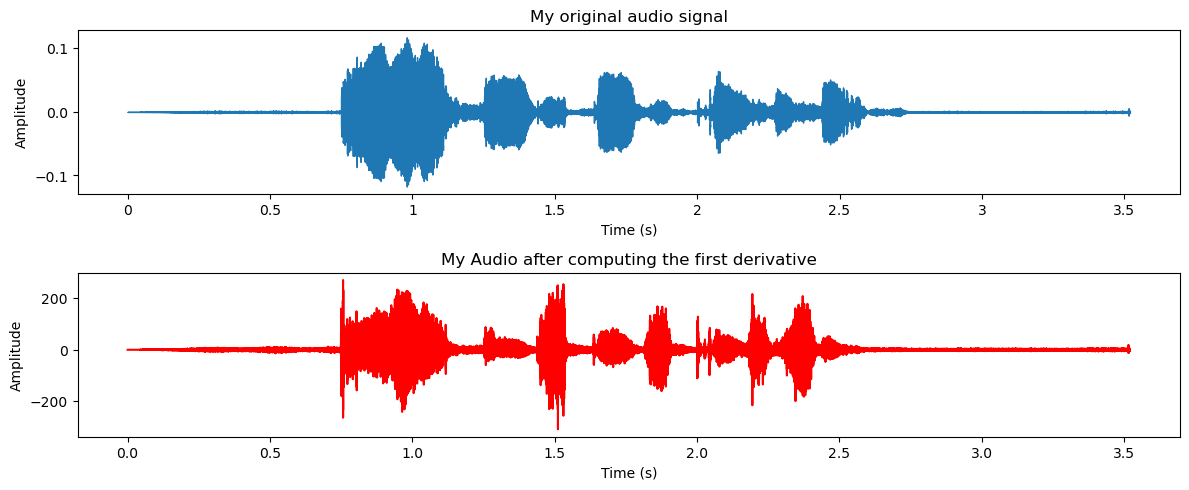

Playing my original audio


Playing my derivative audio


Original signal information
Original Signal Length: 155232 samples
Original Magnitude Range: -0.1077880859375 to 0.1173095703125
Original Signal Peak Frequency: 6693.512835137804 Hz
Original Signal Peak Amplitude: 0.0 dB
-----------------------------------------------------------------
Derivative signal information
Derivative Signal Length: 155231 samples
Derivative Magnitude Range: -307.745361328125 to 270.062255859375
Derivative Signal Peak Frequency: 13114.902163395553 Hz
Derivative Signal Peak Amplitude: 7.62939453125e-06 dB


In [31]:
## Question 1

import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from scipy.signal import find_peaks
from IPython.display import Audio

shreya = r'E:\Shreya Kunda\Amrita 2021-2025\Amrita Semester Academics\SEMESTER 6\AI in Speech Processing\Lab01\shreya_speech.wav'
shreya1, sr = librosa.load(shreya, sr=None)
time = np.arange(0, len(shreya1)) / sr
dt = time[3] - time[0]

# Finding first derivative
derivative = np.diff(shreya1) / dt
write('E:\Shreya Kunda\Amrita 2021-2025\Amrita Semester Academics\SEMESTER 6\AI in Speech Processing\Lab01\derivative_shreya.wav', sr, derivative)
plt.figure(figsize=(12, 7))
plt.subplot(3, 1, 1)
librosa.display.waveshow(shreya1, sr=sr)
plt.title('My original audio signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(time[:-1], derivative, label='First Derivative', color='red')
plt.title('My Audio after computing the first derivative')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()
print("Playing my original audio")
display(Audio(shreya1, rate=sr))
print("Playing my derivative audio")
display(Audio(derivative, rate=sr))

print("Original signal information")
print(f"Original Signal Length: {len(shreya1)} samples")
print(f"Original Magnitude Range: {shreya1.min()} to {shreya1.max()}")
original_freq = librosa.feature.spectral_centroid(y=shreya1, sr=sr)[0]
original_peaks, _ = find_peaks(original_freq)
print(f"Original Signal Peak Frequency: {original_freq[original_peaks][0]} Hz")
original_amplitude = librosa.amplitude_to_db(np.abs(librosa.stft(shreya1)), ref=np.max)
print(f"Original Signal Peak Amplitude: {np.max(original_amplitude)} dB")

print("-----------------------------------------------------------------")
print("Derivative signal information")
print(f"Derivative Signal Length: {len(derivative)} samples")
print(f"Derivative Magnitude Range: {derivative.min()} to {derivative.max()}")
derivative_freq = librosa.feature.spectral_centroid(y=derivative, sr=sr)[0]
derivative_peaks, _ = find_peaks(derivative_freq)
print(f"Derivative Signal Peak Frequency: {derivative_freq[derivative_peaks][0]} Hz")
derivative_amplitude = librosa.amplitude_to_db(np.abs(librosa.stft(derivative)), ref=np.max)
print(f"Derivative Signal Peak Amplitude: {np.max(derivative_amplitude)} dB")


Average length between two consecutive zero crossings for speech regions: 1.0193500355625869
Average length between two consecutive zero crossings for silence regions: 32.398037987893964


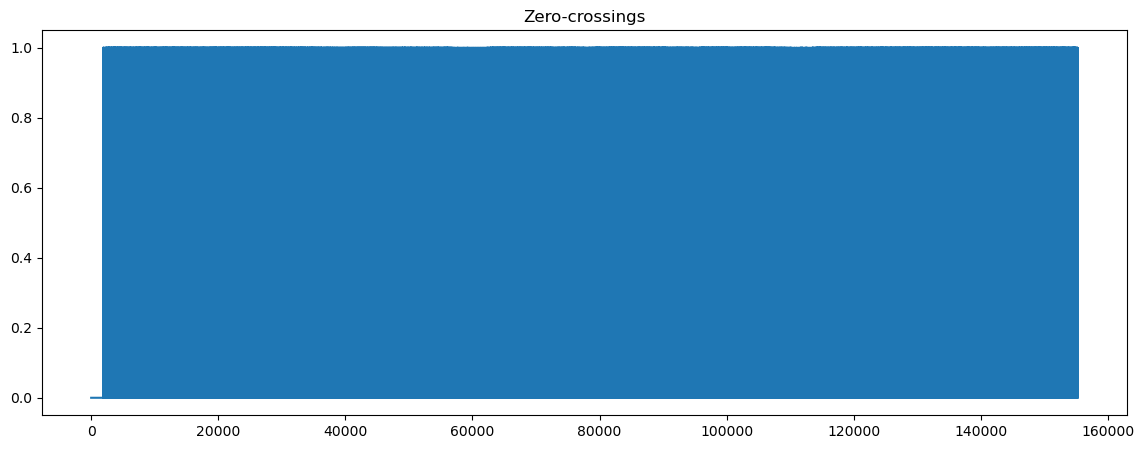

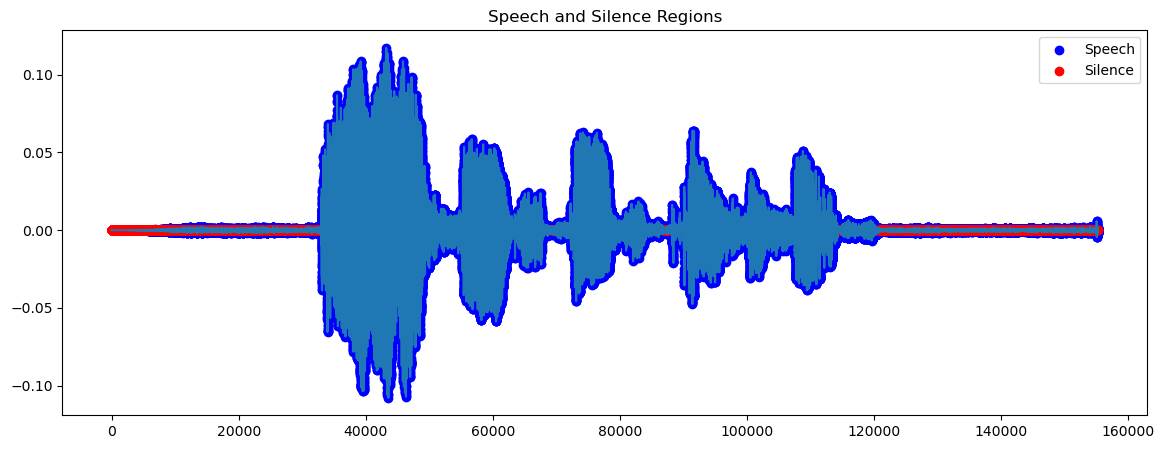

In [46]:
## Question 2

zero_crossings = librosa.zero_crossings(derivative, pad=False)
speech_regions = np.where(shreya1 != 0)[0]
silence_regions = np.where(shreya1 == 0)[0]
avg_length_speech = np.mean(np.diff(speech_regions))
avg_length_silence = np.mean(np.diff(silence_regions))

print(f'Average length between two consecutive zero crossings for speech regions: {avg_length_speech}')
print(f'Average length between two consecutive zero crossings for silence regions: {avg_length_silence}')
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))
plt.plot(zero_crossings)
plt.title('Zero-crossings')
plt.show()
plt.figure(figsize=(14, 5))
plt.plot(shreya1)
plt.scatter(speech_regions, shreya1[speech_regions], color='b', label='Speech')
plt.scatter(silence_regions, shreya1[silence_regions], color='r', label='Silence')
plt.legend()
plt.title('Speech and Silence Regions')
plt.show()

Length of shreya audio: 7.296009070294785 seconds
Length of pranave audio: 7.082675736961451 seconds


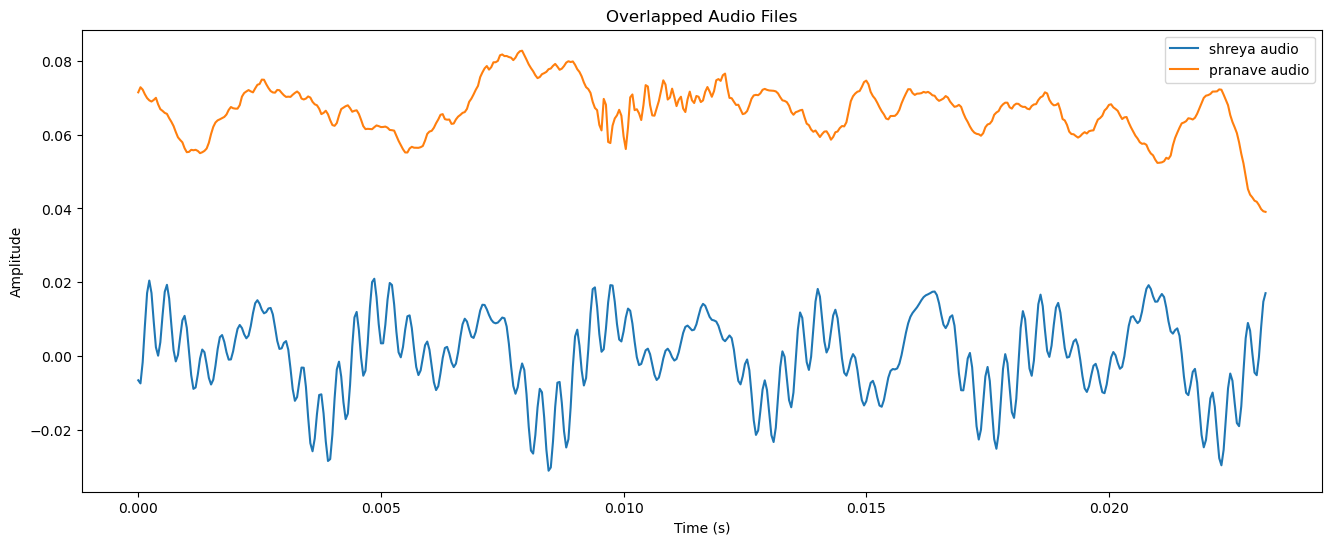

In [56]:
## Question 3

import librosa
shreya, sr1 = librosa.load(r'E:\Shreya Kunda\Amrita 2021-2025\Amrita Semester Academics\SEMESTER 6\AI in Speech Processing\Lab01\shreya_2.wav')
length1 = len(shreya) / sr1
print(f'Length of shreya audio: {length1} seconds')
pranave, sr2 = librosa.load(r'E:\Shreya Kunda\Amrita 2021-2025\Amrita Semester Academics\SEMESTER 6\AI in Speech Processing\Lab01\teammate.wav')
length2 = len(pranave) / sr2
print(f'Length of pranave audio: {length2} seconds')
def remove_silence(y, sr, threshold=0.01):
    yt = librosa.effects.trim(y, top_db=threshold) 
    return yt[0]

shreya1 = remove_silence(shreya, sr1)
pranave1 = remove_silence(pranave, sr2)

# Calculate the time axes for the trimmed audio files
time1 = np.linspace(0, len(shreya1) / sr1, len(shreya1))
time2 = np.linspace(0, len(pranave1) / sr2, len(pranave1))

# Plot the trimmed audio files
plt.figure(figsize=(16, 6))
plt.plot(time1, shreya1, label='shreya audio')
plt.plot(time2, pranave1, label='pranave audio')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Overlapped Audio Files')
plt.show()

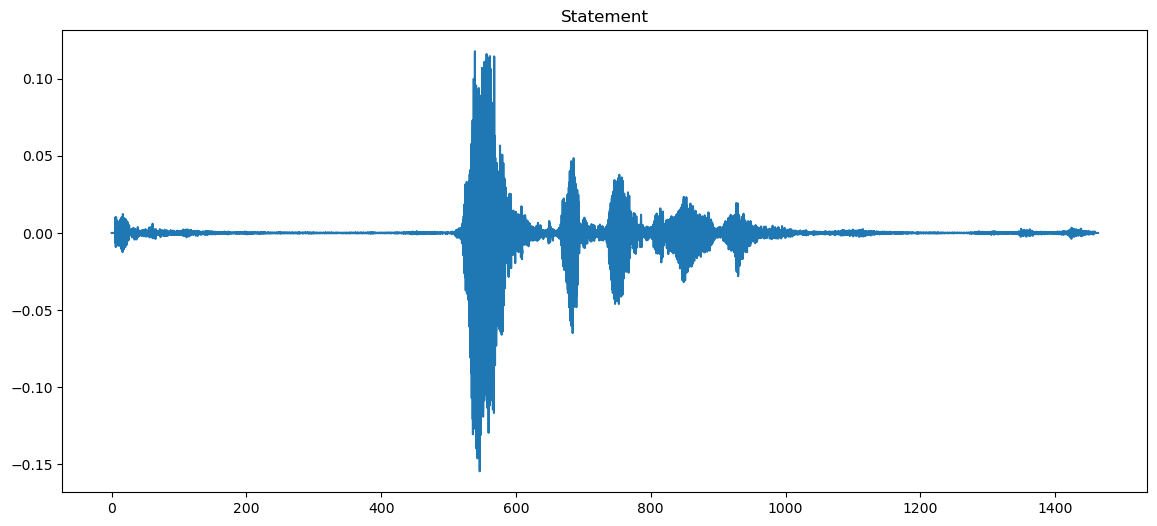

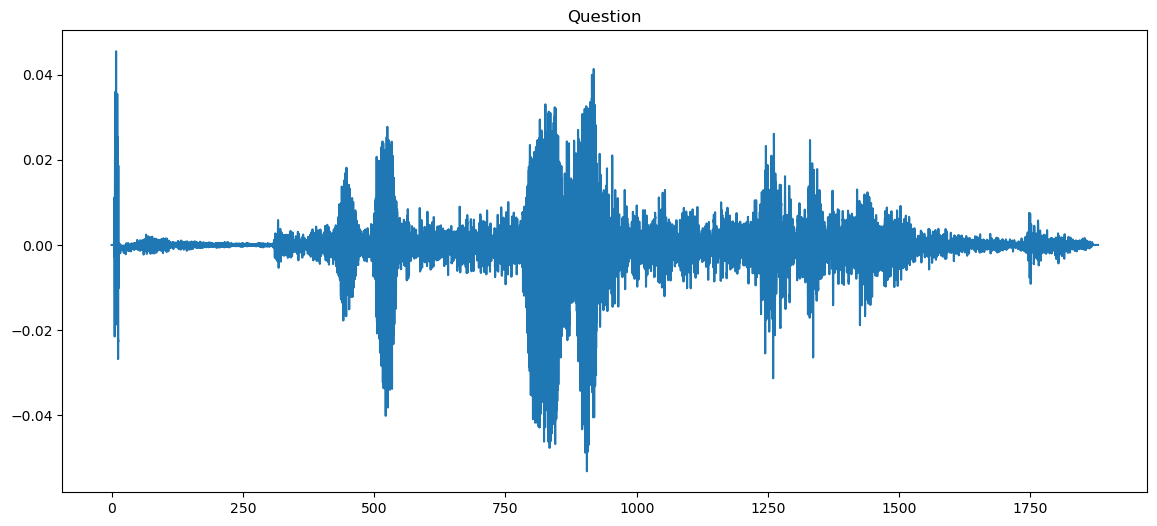

In [62]:
## Question 4

shreya_s, sr_s = librosa.load(r'E:\Shreya Kunda\Amrita 2021-2025\Amrita Semester Academics\SEMESTER 6\AI in Speech Processing\Lab01\shreya_statement.wav')
shreya_q, sr_q = librosa.load(r'E:\Shreya Kunda\Amrita 2021-2025\Amrita Semester Academics\SEMESTER 6\AI in Speech Processing\Lab01\shreya_question.wav')
time1= librosa.times_like(shreya_s, sr=sr_s)
time2 = librosa.times_like(shreya_q, sr=sr_q)
plt.figure(figsize=(14, 6))
plt.plot(time1, shreya_s)
plt.title('Statement')
plt.show()
plt.figure(figsize=(14, 6))
plt.plot(time2, shreya_q)
plt.title('Question')
plt.show()